<a href="https://colab.research.google.com/github/Jueunkim429/Cloud-cloud/blob/main/CNN_Cloud_Cloud1%2C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install libarchive-c

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 93.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 119.5 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102740 sha256=24f13a3202e26cc7acb96297d058c7fe4b6ba8b4a849410d08eca87c3bd1f27a
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [3]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from PIL import Image
import os, glob, numpy as np
import os
from sklearn.model_selection import train_test_split
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend import set_session as K
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.preprocessing.image import ImageDataGenerator
import libarchive
import pydot
import cartopy

In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import tensorflow.keras
print(tensorflow.keras.__version__)

2.12.0


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Image를 학습데이터로 변환

In [8]:
img_dir =  "/content/drive/MyDrive/Colab Notebooks/clouddata/train14" #학습데이터로 변환할 데이터 위치
categories = os.listdir(img_dir)
num_classes = len(categories)

image_w = 64  #64*64*3 사이즈로 조정
image_h = 64

pixel=  image_w * image_h * 3
X=[]
y=[]

for idx, cat in enumerate(categories): # 카테고리를 enumerate를 이용하여 카테고리와 인덱스 사용
    img_dir_detail = img_dir + '/' + cat
    files = glob.glob(img_dir_detail + "/*.jpg")
    for i,f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert('RGB')
            img = img.resize((image_w,image_h)) #이미지의 사이즈를 조정
            data = np.asarray(img)
            X.append(data)
            y.append(idx)
            if i % 300 == 0 : # 300번 마다 프린트
                print(cat, " : ", f)
        except:
            print(cat,str(i)," 번째에서 에러")

X = np.array(X)  #array로 변환
y = np.array(y)  #array로 변환

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3) #train test 구분

Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N156_0_135.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N149_0_9394.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N159_0_3662.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N227_0_6095.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N027_0_1818.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N063_0_5104.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_Cb-N111_0_4797.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_0_626.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_0_8064.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/new_0_4888.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/clouddata/train14/Cb/Cb-N022.jpg
Cb  :  /content/drive/MyDrive/Colab Notebooks/c

## 학습데이터 가공

In [9]:
print(X_train.shape) # 데이터 크기 확인
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# img를 array로 변환시 0~255의 값을 가지는데 이것을 0~1로 변환
X_train = X_train.astype(float) / 255.0
X_test = X_test.astype(float) / 255.0

from keras.utils import to_categorical
# 기존의 1의 값을가지는 y값을 [0,1,0,0,---]와 같이 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(12846, 64, 64, 3)
(12846,)
(5506, 64, 64, 3)
(5506,)


## 모델 구축

### model 1

In [10]:
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model = Sequential()

    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_dir = './model'
    model_path = model_dir + "/cloud_classify.model"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [12]:
X_train.shape
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
362/362 [==============================] - 14s 9ms/step - loss: 1.2605 - accuracy: 0.4951 - val_loss: 1.1239 - val_accuracy: 0.5829
Epoch 2/100
362/362 [==============================] - 3s 7ms/step - loss: 1.0531 - accuracy: 0.5878 - val_loss: 0.9978 - val_accuracy: 0.6054
Epoch 3/100
362/362 [==============================] - 3s 7ms/step - loss: 0.9433 - accuracy: 0.6360 - val_loss: 0.8657 - val_accuracy: 0.6677
Epoch 4/100
362/362 [==============================] - 3s 7ms/step - loss: 0.8488 - accuracy: 0.6745 - val_loss: 0.7791 - val_accuracy: 0.7128
Epoch 5/100
362/362 [==============================] - 3s 7ms/step - loss: 0.7417 - accuracy: 0.7214 - val_loss: 0.7304 - val_accuracy: 0.7152
Epoch 6/100
362/362 [==============================] - 3s 7ms/step - loss: 0.6619 - accuracy: 0.7497 - val_loss: 0.6245 - val_accuracy: 0.7712
Epoch 7/100
362/362 [==============================] - 3s 7ms/step - loss: 0.5747 - accuracy: 0.7829 - val_loss: 0.5786 - val_accuracy: 0.795

In [13]:
print("정확도 : %.2f" %(model.evaluate(X_test, y_test)[1]))

173/173 [==============================] - 1s 3ms/step - loss: 0.4782 - accuracy: 0.9134
정확도 : 0.91


In [14]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9296
평균 손실: 0.1911
평균 검증 정확도: 0.8720
평균 검증 손실: 0.5358


### model 2

In [15]:
with tf.device('/device:GPU:0'):
    model2 = Sequential()

    model2.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model2.add(MaxPooling2D(pool_size=(2,2)))
    model2.add(Dropout(0.25))

    model2.add(Flatten())
    model2.add(Dense(256, activation = 'relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(num_classes, activation = 'softmax'))

    model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

    model_dir = './model2'
    model_path = model_dir + "/cloud_classify.model2"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)


In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)       

In [17]:
history = model2.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
362/362 [==============================] - 7s 11ms/step - loss: 1.2496 - accuracy: 0.4926 - val_loss: 1.1881 - val_accuracy: 0.5214
Epoch 2/100
362/362 [==============================] - 3s 9ms/step - loss: 1.0298 - accuracy: 0.5998 - val_loss: 1.0211 - val_accuracy: 0.5930
Epoch 3/100
362/362 [==============================] - 3s 9ms/step - loss: 0.8880 - accuracy: 0.6592 - val_loss: 0.7892 - val_accuracy: 0.7152
Epoch 4/100
362/362 [==============================] - 3s 9ms/step - loss: 0.7578 - accuracy: 0.7101 - val_loss: 0.7255 - val_accuracy: 0.7362
Epoch 5/100
362/362 [==============================] - 3s 9ms/step - loss: 0.6486 - accuracy: 0.7558 - val_loss: 0.6034 - val_accuracy: 0.7821
Epoch 6/100
362/362 [==============================] - 3s 9ms/step - loss: 0.5466 - accuracy: 0.7941 - val_loss: 0.5871 - val_accuracy: 0.7953
Epoch 7/100
362/362 [==============================] - 3s 9ms/step - loss: 0.4588 - accuracy: 0.8273 - val_loss: 0.5192 - val_accuracy: 0.797

In [18]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9411
평균 손실: 0.1655
평균 검증 정확도: 0.9053
평균 검증 손실: 0.3350


### model2 + normalization

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

with tf.device('/device:GPU:0'):
    model3 = Sequential()

    model3.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:]))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Conv2D(64, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Conv2D(128, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(Conv2D(128, (3,3), padding="same"))
    model3.add(BatchNormalization())
    model3.add(Activation("relu"))
    model3.add(MaxPooling2D(pool_size=(2,2)))
    model3.add(Dropout(0.25))

    model3.add(Flatten())
    model3.add(Dense(256, activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(num_classes, activation='softmax'))

    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_dir = './model3'
    model_path = model_dir + "/cloud_classify.model3"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)       

In [21]:
history = model3.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
362/362 [==============================] - 9s 14ms/step - loss: 1.5092 - accuracy: 0.4250 - val_loss: 1.4872 - val_accuracy: 0.3805
Epoch 2/100
362/362 [==============================] - 5s 13ms/step - loss: 1.2394 - accuracy: 0.4792 - val_loss: 1.1253 - val_accuracy: 0.5447
Epoch 3/100
362/362 [==============================] - 5s 13ms/step - loss: 1.1663 - accuracy: 0.5144 - val_loss: 1.0938 - val_accuracy: 0.5463
Epoch 4/100
362/362 [==============================] - 5s 13ms/step - loss: 1.1019 - accuracy: 0.5433 - val_loss: 1.1331 - val_accuracy: 0.5253
Epoch 5/100
362/362 [==============================] - 5s 13ms/step - loss: 1.0438 - accuracy: 0.5814 - val_loss: 2.3188 - val_accuracy: 0.4070
Epoch 6/100
362/362 [==============================] - 5s 13ms/step - loss: 1.0011 - accuracy: 0.5961 - val_loss: 0.9332 - val_accuracy: 0.6358
Epoch 7/100
362/362 [==============================] - 5s 13ms/step - loss: 0.9585 - accuracy: 0.6250 - val_loss: 0.8713 - val_accuracy:

In [22]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.8723
평균 손실: 0.3353
평균 검증 정확도: 0.8244
평균 검증 손실: 0.6490


### model1 + **normalization**

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 모델 구성
model4 = Sequential()

model4.add(Conv2D(32, (3,3), padding="same", input_shape=(image_w, image_h, 3), activation="relu"))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_dir = './model4'
model_path = model_dir + "/cloud_classify.model4"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [24]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 64)      

In [25]:
X_train.shape
history = model4.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
362/362 [==============================] - 6s 10ms/step - loss: 1.7254 - accuracy: 0.4519 - val_loss: 9.7820 - val_accuracy: 0.1798
Epoch 2/100
362/362 [==============================] - 3s 9ms/step - loss: 1.2025 - accuracy: 0.5099 - val_loss: 1.0629 - val_accuracy: 0.5774
Epoch 3/100
362/362 [==============================] - 3s 10ms/step - loss: 1.1288 - accuracy: 0.5429 - val_loss: 1.0645 - val_accuracy: 0.5759
Epoch 4/100
362/362 [==============================] - 3s 9ms/step - loss: 1.0797 - accuracy: 0.5655 - val_loss: 0.9787 - val_accuracy: 0.6117
Epoch 5/100
362/362 [==============================] - 3s 9ms/step - loss: 1.0428 - accuracy: 0.5807 - val_loss: 0.9140 - val_accuracy: 0.6304
Epoch 6/100
362/362 [==============================] - 3s 10ms/step - loss: 0.9802 - accuracy: 0.6088 - val_loss: 1.1113 - val_accuracy: 0.5914
Epoch 7/100
362/362 [==============================] - 3s 10ms/step - loss: 0.9594 - accuracy: 0.6142 - val_loss: 0.8531 - val_accuracy: 0.

In [26]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.8251
평균 손실: 0.4591
평균 검증 정확도: 0.7810
평균 검증 손실: 0.8754


### model1+RMSprop

In [27]:
from tensorflow.keras.optimizers import RMSprop
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model5 = Sequential()

    model5.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model5.add(MaxPooling2D(pool_size=(2,2)))
    model5.add(Dropout(0.25))

    model5.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model5.add(MaxPooling2D(pool_size=(2,2)))
    model5.add(Dropout(0.25))

    model5.add(Flatten())
    model5.add(Dense(256, activation='relu'))
    model5.add(Dropout(0.5))
    model5.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model5.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

    model_dir = './model5'
    model_path = model_dir + "/cloud_classify.model5"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [28]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 16, 16, 64)       

In [29]:
X_train.shape
history = model5.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
362/362 [==============================] - 4s 8ms/step - loss: 1.2792 - accuracy: 0.4987 - val_loss: 1.1738 - val_accuracy: 0.5696
Epoch 2/100
362/362 [==============================] - 3s 7ms/step - loss: 1.0379 - accuracy: 0.6000 - val_loss: 1.0414 - val_accuracy: 0.5837
Epoch 3/100
362/362 [==============================] - 3s 7ms/step - loss: 0.9293 - accuracy: 0.6476 - val_loss: 0.9588 - val_accuracy: 0.6374
Epoch 4/100
362/362 [==============================] - 3s 7ms/step - loss: 0.8309 - accuracy: 0.6796 - val_loss: 0.8449 - val_accuracy: 0.6848
Epoch 5/100
362/362 [==============================] - 3s 7ms/step - loss: 0.7458 - accuracy: 0.7153 - val_loss: 0.8210 - val_accuracy: 0.7206
Epoch 6/100
362/362 [==============================] - 3s 7ms/step - loss: 0.6645 - accuracy: 0.7522 - val_loss: 0.6972 - val_accuracy: 0.7572
Epoch 7/100
362/362 [==============================] - 3s 7ms/step - loss: 0.6002 - accuracy: 0.7810 - val_loss: 0.8196 - val_accuracy: 0.6918

In [30]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9093
평균 손실: 0.2839
평균 검증 정확도: 0.8543
평균 검증 손실: 0.5464


### model2+RMSprop

In [31]:
with tf.device('/device:GPU:0'):
    model6 = Sequential()

    model6.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Dropout(0.25))

    model6.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Dropout(0.25))

    model6.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model6.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model6.add(MaxPooling2D(pool_size=(2,2)))
    model6.add(Dropout(0.25))

    model6.add(Flatten())
    model6.add(Dense(256, activation = 'relu'))
    model6.add(Dropout(0.5))
    model6.add(Dense(num_classes, activation = 'softmax'))

    model6.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop',metrics=['accuracy'])

    model_dir = './model6'
    model_path = model_dir + "/cloud_classify.model6"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)

In [32]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 64)       

In [33]:
history = model6.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
362/362 [==============================] - 5s 10ms/step - loss: 1.2927 - accuracy: 0.4733 - val_loss: 1.0834 - val_accuracy: 0.5658
Epoch 2/100
362/362 [==============================] - 3s 9ms/step - loss: 1.0584 - accuracy: 0.5899 - val_loss: 1.2193 - val_accuracy: 0.5268
Epoch 3/100
362/362 [==============================] - 3s 9ms/step - loss: 0.9320 - accuracy: 0.6477 - val_loss: 0.9294 - val_accuracy: 0.6412
Epoch 4/100
362/362 [==============================] - 3s 9ms/step - loss: 0.8087 - accuracy: 0.6986 - val_loss: 0.8531 - val_accuracy: 0.6848
Epoch 5/100
362/362 [==============================] - 3s 9ms/step - loss: 0.7000 - accuracy: 0.7454 - val_loss: 0.9148 - val_accuracy: 0.6661
Epoch 6/100
362/362 [==============================] - 3s 9ms/step - loss: 0.6026 - accuracy: 0.7818 - val_loss: 0.6278 - val_accuracy: 0.7673
Epoch 7/100
362/362 [==============================] - 3s 9ms/step - loss: 0.5477 - accuracy: 0.8080 - val_loss: 0.5370 - val_accuracy: 0.814

In [34]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.7499
평균 손실: 0.8166
평균 검증 정확도: 0.7445
평균 검증 손실: 0.8284


### model1+Adamax

In [35]:
from tensorflow.keras.optimizers import Adamax
image_w = 64
image_h = 64

with tf.device('/device:GPU:0'):
    model7 = Sequential()

    model7.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model7.add(MaxPooling2D(pool_size=(2,2)))
    model7.add(Dropout(0.25))

    model7.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model7.add(MaxPooling2D(pool_size=(2,2)))
    model7.add(Dropout(0.25))

    model7.add(Flatten())
    model7.add(Dense(256, activation='relu'))
    model7.add(Dropout(0.5))
    model7.add(Dense(num_classes, activation='softmax')) # 출력 레이어 수정

    model7.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

    model_dir = './model7'
    model_path = model_dir + "/cloud_classify.model7"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [36]:
model7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 16, 16, 64)       

In [37]:
X_train.shape
history = model7.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
362/362 [==============================] - 5s 8ms/step - loss: 1.2648 - accuracy: 0.4885 - val_loss: 1.2039 - val_accuracy: 0.5307
Epoch 2/100
362/362 [==============================] - 3s 7ms/step - loss: 1.0727 - accuracy: 0.5779 - val_loss: 1.0565 - val_accuracy: 0.6008
Epoch 3/100
362/362 [==============================] - 3s 7ms/step - loss: 0.9788 - accuracy: 0.6181 - val_loss: 0.9677 - val_accuracy: 0.6241
Epoch 4/100
362/362 [==============================] - 3s 7ms/step - loss: 0.9061 - accuracy: 0.6558 - val_loss: 0.9226 - val_accuracy: 0.6475
Epoch 5/100
362/362 [==============================] - 3s 8ms/step - loss: 0.8525 - accuracy: 0.6736 - val_loss: 0.8463 - val_accuracy: 0.6856
Epoch 6/100
362/362 [==============================] - 3s 7ms/step - loss: 0.7896 - accuracy: 0.6935 - val_loss: 0.8130 - val_accuracy: 0.6926
Epoch 7/100
362/362 [==============================] - 3s 7ms/step - loss: 0.7300 - accuracy: 0.7250 - val_loss: 0.7464 - val_accuracy: 0.7253

In [38]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9255
평균 손실: 0.2042
평균 검증 정확도: 0.8779
평균 검증 손실: 0.4353


### model2+Adamax

In [39]:
from tensorflow.keras.optimizers import Adamax

with tf.device('/device:GPU:0'):
    model8 = Sequential()

    model8.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation="relu"))
    model8.add(MaxPooling2D(pool_size=(2,2)))
    model8.add(Dropout(0.25))

    model8.add(Conv2D(64, (3,3), padding="same", activation="relu"))
    model8.add(MaxPooling2D(pool_size=(2,2)))
    model8.add(Dropout(0.25))

    model8.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model8.add(Conv2D(128, (3,3), padding="same", activation="relu")) #새로추가
    model8.add(MaxPooling2D(pool_size=(2,2)))
    model8.add(Dropout(0.25))

    model8.add(Flatten())
    model8.add(Dense(256, activation = 'relu'))
    model8.add(Dropout(0.5))
    model8.add(Dense(num_classes, activation = 'softmax'))

    model8.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax',metrics=['accuracy'])

    model_dir = './model8'
    model_path = model_dir + "/cloud_classify.model8"

    checkpoint = ModelCheckpoint(filepath = model_path, monitor='val_loss', verbose = 1, save_best_only = True)
    early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)

In [40]:
model8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 16, 16, 64)       

In [41]:
history = model8.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
362/362 [==============================] - 6s 10ms/step - loss: 1.2804 - accuracy: 0.4734 - val_loss: 1.1818 - val_accuracy: 0.5463
Epoch 2/100
362/362 [==============================] - 3s 9ms/step - loss: 1.0887 - accuracy: 0.5713 - val_loss: 1.0530 - val_accuracy: 0.5774
Epoch 3/100
362/362 [==============================] - 3s 9ms/step - loss: 0.9764 - accuracy: 0.6237 - val_loss: 0.9158 - val_accuracy: 0.6366
Epoch 4/100
362/362 [==============================] - 3s 9ms/step - loss: 0.8651 - accuracy: 0.6714 - val_loss: 0.8185 - val_accuracy: 0.6833
Epoch 5/100
362/362 [==============================] - 3s 9ms/step - loss: 0.7792 - accuracy: 0.7064 - val_loss: 0.7982 - val_accuracy: 0.6856
Epoch 6/100
362/362 [==============================] - 3s 9ms/step - loss: 0.6919 - accuracy: 0.7398 - val_loss: 0.7397 - val_accuracy: 0.7276
Epoch 7/100
362/362 [==============================] - 3s 9ms/step - loss: 0.6109 - accuracy: 0.7740 - val_loss: 0.5969 - val_accuracy: 0.769

In [42]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9447
평균 손실: 0.1493
평균 검증 정확도: 0.9140
평균 검증 손실: 0.2719


### model1+Adamax+normalization

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adamax

# 모델 구성
model9 = Sequential()

model9.add(Conv2D(32, (3,3), padding="same", input_shape=(image_w, image_h, 3), activation="relu"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.25))

model9.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2,2)))
model9.add(Dropout(0.25))

model9.add(Flatten())
model9.add(Dense(256, activation='relu'))
model9.add(Dropout(0.5))
model9.add(Dense(num_classes, activation='softmax'))

model9.compile(loss = 'categorical_crossentropy', optimizer = 'Adamax',metrics=['accuracy'])

model_dir = './model9'
model_path = model_dir + "/cloud_classify.model9"

checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [44]:
model9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 64)      

In [45]:
X_train.shape
history = model9.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
362/362 [==============================] - 6s 11ms/step - loss: 1.5708 - accuracy: 0.4933 - val_loss: 19.5789 - val_accuracy: 0.2444
Epoch 2/100
362/362 [==============================] - 3s 9ms/step - loss: 1.0892 - accuracy: 0.5763 - val_loss: 1.0158 - val_accuracy: 0.6389
Epoch 3/100
362/362 [==============================] - 3s 9ms/step - loss: 0.9736 - accuracy: 0.6165 - val_loss: 0.9140 - val_accuracy: 0.6724
Epoch 4/100
362/362 [==============================] - 3s 9ms/step - loss: 0.8995 - accuracy: 0.6552 - val_loss: 0.9329 - val_accuracy: 0.6747
Epoch 5/100
362/362 [==============================] - 3s 9ms/step - loss: 0.8241 - accuracy: 0.6795 - val_loss: 0.8097 - val_accuracy: 0.7121
Epoch 6/100
362/362 [==============================] - 3s 9ms/step - loss: 0.7530 - accuracy: 0.7079 - val_loss: 0.7570 - val_accuracy: 0.7307
Epoch 7/100
362/362 [==============================] - 3s 9ms/step - loss: 0.6935 - accuracy: 0.7308 - val_loss: 0.6684 - val_accuracy: 0.77

In [46]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.9225
평균 손실: 0.2066
평균 검증 정확도: 0.8679
평균 검증 손실: 0.6686


### model2+Adamax+normalization

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

with tf.device('/device:GPU:0'):
    model10 = Sequential()

    model10.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:]))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(MaxPooling2D(pool_size=(2,2)))
    model10.add(Dropout(0.25))

    model10.add(Conv2D(64, (3,3), padding="same"))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(MaxPooling2D(pool_size=(2,2)))
    model10.add(Dropout(0.25))

    model10.add(Conv2D(128, (3,3), padding="same"))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(Conv2D(128, (3,3), padding="same"))
    model10.add(BatchNormalization())
    model10.add(Activation("relu"))
    model10.add(MaxPooling2D(pool_size=(2,2)))
    model10.add(Dropout(0.25))

    model10.add(Flatten())
    model10.add(Dense(256, activation='relu'))
    model10.add(Dropout(0.5))
    model10.add(Dense(num_classes, activation='softmax'))

    model10.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])

    model_dir = './model10'
    model_path = model_dir + "/cloud_classify.model10"

    checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [48]:
model10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_31 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 64)       

In [49]:
history = model10.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)
#callbacks=[checkpoint, early_stopping]

Epoch 1/100
362/362 [==============================] - 8s 14ms/step - loss: 1.5117 - accuracy: 0.4705 - val_loss: 1.4908 - val_accuracy: 0.3401
Epoch 2/100
362/362 [==============================] - 5s 13ms/step - loss: 1.1628 - accuracy: 0.5442 - val_loss: 1.1714 - val_accuracy: 0.5253
Epoch 3/100
362/362 [==============================] - 5s 13ms/step - loss: 1.0738 - accuracy: 0.5839 - val_loss: 1.0247 - val_accuracy: 0.5899
Epoch 4/100
362/362 [==============================] - 5s 13ms/step - loss: 1.0207 - accuracy: 0.6056 - val_loss: 1.1181 - val_accuracy: 0.5626
Epoch 5/100
362/362 [==============================] - 5s 13ms/step - loss: 0.9546 - accuracy: 0.6337 - val_loss: 0.8417 - val_accuracy: 0.6809
Epoch 6/100
362/362 [==============================] - 5s 13ms/step - loss: 0.8838 - accuracy: 0.6641 - val_loss: 0.8476 - val_accuracy: 0.6755
Epoch 7/100
362/362 [==============================] - 5s 13ms/step - loss: 0.8360 - accuracy: 0.6839 - val_loss: 0.8851 - val_accuracy:

In [50]:
accuracy = np.mean(history.history['accuracy'])
val_accuracy = np.mean(history.history['val_accuracy'])
loss = np.mean(history.history['loss'])
val_loss = np.mean(history.history['val_loss'])

print(f"평균 정확도: {accuracy:.4f}")
print(f"평균 손실: {loss:.4f}")
print(f"평균 검증 정확도: {val_accuracy:.4f}")
print(f"평균 검증 손실: {val_loss:.4f}")

평균 정확도: 0.8957
평균 손실: 0.2748
평균 검증 정확도: 0.8602
평균 검증 손실: 0.4225


## test

### test data로 비교

In [51]:
from keras.models import load_model

path = "/content/drive/MyDrive/Colab Notebooks/clouddata/test/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train14") #train위치

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model10.predict(X)

file_index = 0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1

7/7 [==============================] - 0s 40ms/step
////////////////////
1.jpg의 예측되는 구름종류 : Sc
////////////////////
100.jpg의 예측되는 구름종류 : Cc
////////////////////
101.jpg의 예측되는 구름종류 : Sc
////////////////////
104.jpg의 예측되는 구름종류 : Cc
////////////////////
10.jpg의 예측되는 구름종류 : Cc
////////////////////
102.jpg의 예측되는 구름종류 : St
////////////////////
106.jpg의 예측되는 구름종류 : Cc
////////////////////
108.jpg의 예측되는 구름종류 : Sc
////////////////////
107.jpg의 예측되는 구름종류 : Cc
////////////////////
103.jpg의 예측되는 구름종류 : Cc
////////////////////
105.jpg의 예측되는 구름종류 : Sc
////////////////////
12.jpg의 예측되는 구름종류 : Cc
////////////////////
130.jpg의 예측되는 구름종류 : Cc
////////////////////
131.jpg의 예측되는 구름종류 : Sc
////////////////////
137.jpg의 예측되는 구름종류 : Sc
////////////////////
122.jpg의 예측되는 구름종류 : St
////////////////////
119.jpg의 예측되는 구름종류 : Sc
////////////////////
117.jpg의 예측되는 구름종류 : Cc
////////////////////
118.jpg의 예측되는 구름종류 : Cc
////////////////////
127.jpg의 예측되는 구름종류 : Sc
////////////////////
123.jpg의 예측되는 구름종류 : Cc
///////

### 직접 찍은 data로 비교

1/1 [==============================] - 0s 164ms/step
////////////////////


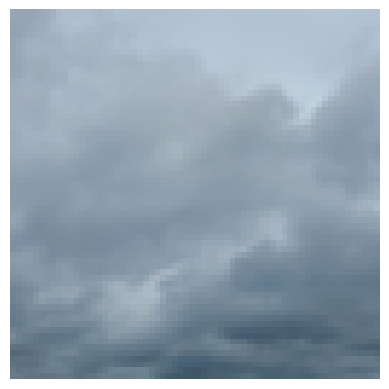

cloud.jpg의 예측되는 구름종류 : Cc
////////////////////


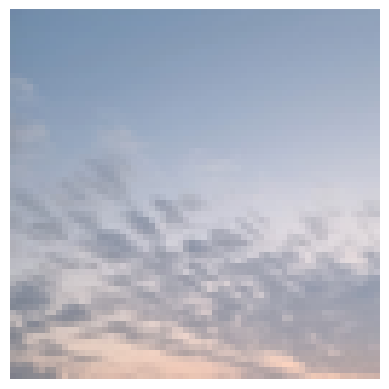

cloud1.jpg의 예측되는 구름종류 : Cc
////////////////////


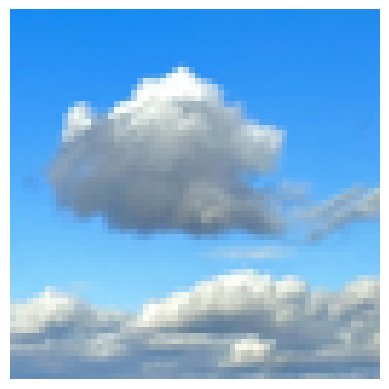

cloud2.jpg의 예측되는 구름종류 : Cc
////////////////////


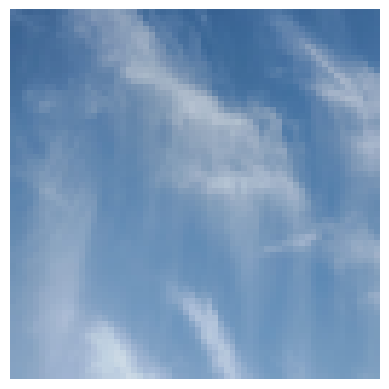

cloud3.jpg의 예측되는 구름종류 : Cc


In [52]:
from keras.models import load_model

path2 = "/content/drive/MyDrive/Colab Notebooks/mydata/"
category = os.listdir("/content/drive/MyDrive/Colab Notebooks/clouddata/train14")

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(path2+"/*.*")
for f in files:
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
prediction_test = model10.predict(X)

file_index = 0
k=0
for i in prediction_test:
    label = i.argmax() # [0.000, 0.000, 0.000, ..., 0.000, 1.000, 0.000] 중 최대값 추출 즉,1값의 인덱스
    print("////////////////////")
    # Display the image
    plt.imshow(X[k])
    plt.axis('off')
    plt.show()
    print( filenames[file_index].split('/')[-1] + "의 예측되는 구름종류 : " + category[label])
    file_index  = file_index+1
    k=k+1